In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
import json
import pandas as pd

# Load the JSON file
file_path = './downloaded_data.json'  # Replace with your file path
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the "datetime" field to a DataFrame
df = pd.DataFrame({'datetime': data['datetime'], 'Hp60': data['Hp60']})
df


,datetime,Hp60
0,2021-01-01T00:00:00Z,0.667
1,2021-01-01T01:00:00Z,0.000
2,2021-01-01T02:00:00Z,0.333
3,2021-01-01T03:00:00Z,0.000
4,2021-01-01T04:00:00Z,1.000
...,...,...
34843,2024-12-22T19:00:00Z,2.667
34844,2024-12-22T20:00:00Z,3.000
34845,2024-12-22T21:00:00Z,3.333
34846,2024-12-22T22:00:00Z,3.000


In [3]:
# Remove the 'Z' and convert to Pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'].str.replace('Z', ''))

# Separate components
df['date'] = df['datetime'].dt.date       # Extract date
df['time'] = df['datetime'].dt.time       # Extract time
df['year'] = df['datetime'].dt.year       # Extract year
df['month'] = df['datetime'].dt.month     # Extract month
df['day'] = df['datetime'].dt.day         # Extract day
df['hour'] = df['datetime'].dt.hour       # Extract hour

df = df.drop(columns=['datetime','date','time'])

df

,Hp60,year,month,day,hour
0,0.667,2021,1,1,0
1,0.000,2021,1,1,1
2,0.333,2021,1,1,2
3,0.000,2021,1,1,3
4,1.000,2021,1,1,4
...,...,...,...,...,...
34843,2.667,2024,12,22,19
34844,3.000,2024,12,22,20
34845,3.333,2024,12,22,21
34846,3.000,2024,12,22,22


In [4]:
len(df[df['year'] == 2021])

8760

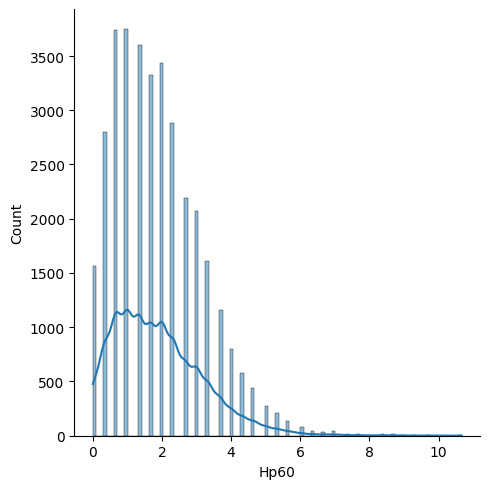

In [5]:
sns.displot(data=df['Hp60'],kde=True)

plt.show()

In [6]:
def plot_year(year):
    df_year = df[df["year"] == year]
    # Group by 'month' and 'day', calculate the mean of 'Hp60' for each day in each month
    df_grouped = df_year.groupby(['month', 'day'])['Hp60'].mean().reset_index()

    # Plot using Seaborn for better visualization
    plt.figure(figsize=(24, 6))
    sns.lineplot(data=df_grouped, x='day', y='Hp60', hue='month', marker='o')

    # Customize plot for better clarity
    plt.title('Comparison of Hp60 for Each Day in Every Month')
    plt.xlabel('Day of the Month')
    plt.ylabel('Hp60')
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

    # Display the plot
    plt.show()


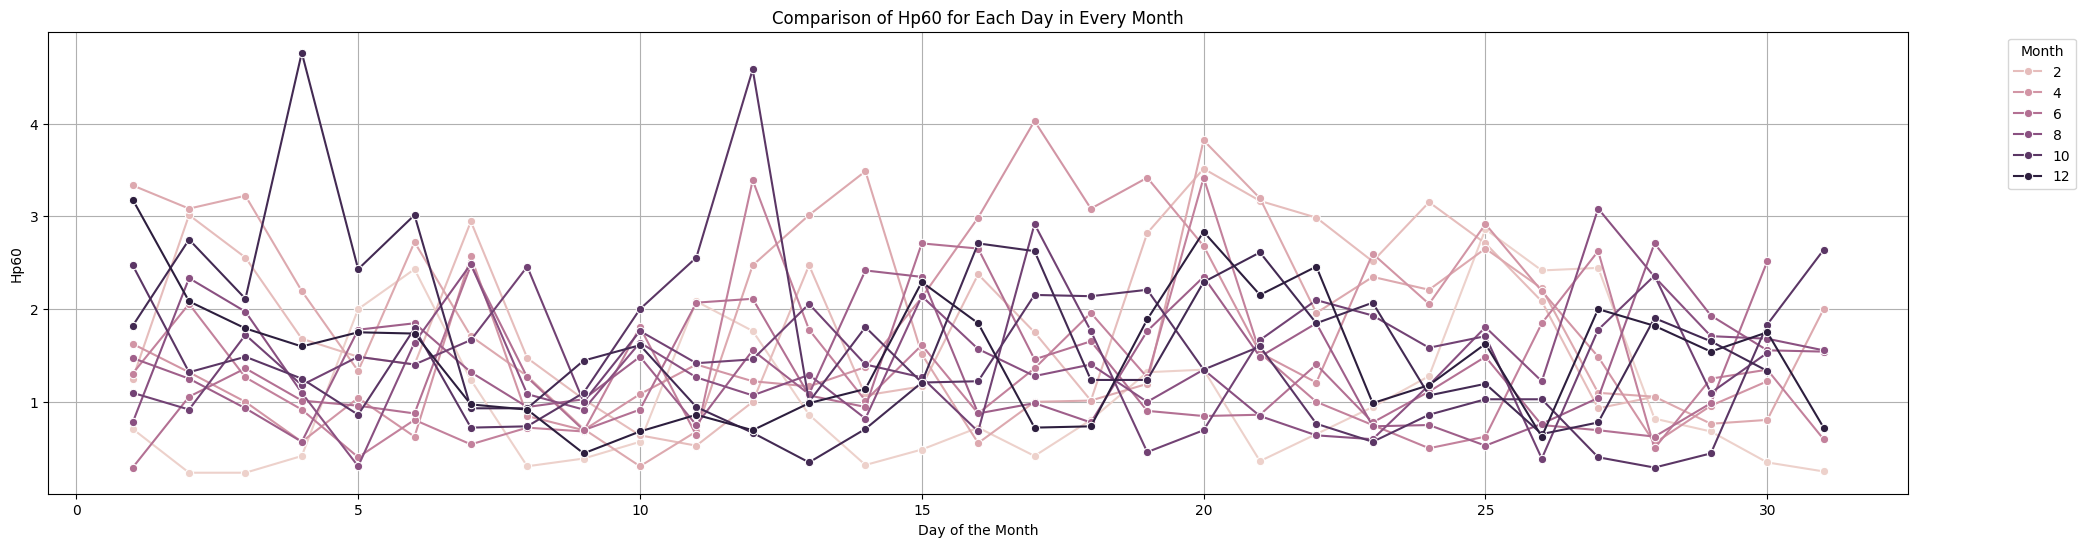

In [7]:
plot_year(2021)

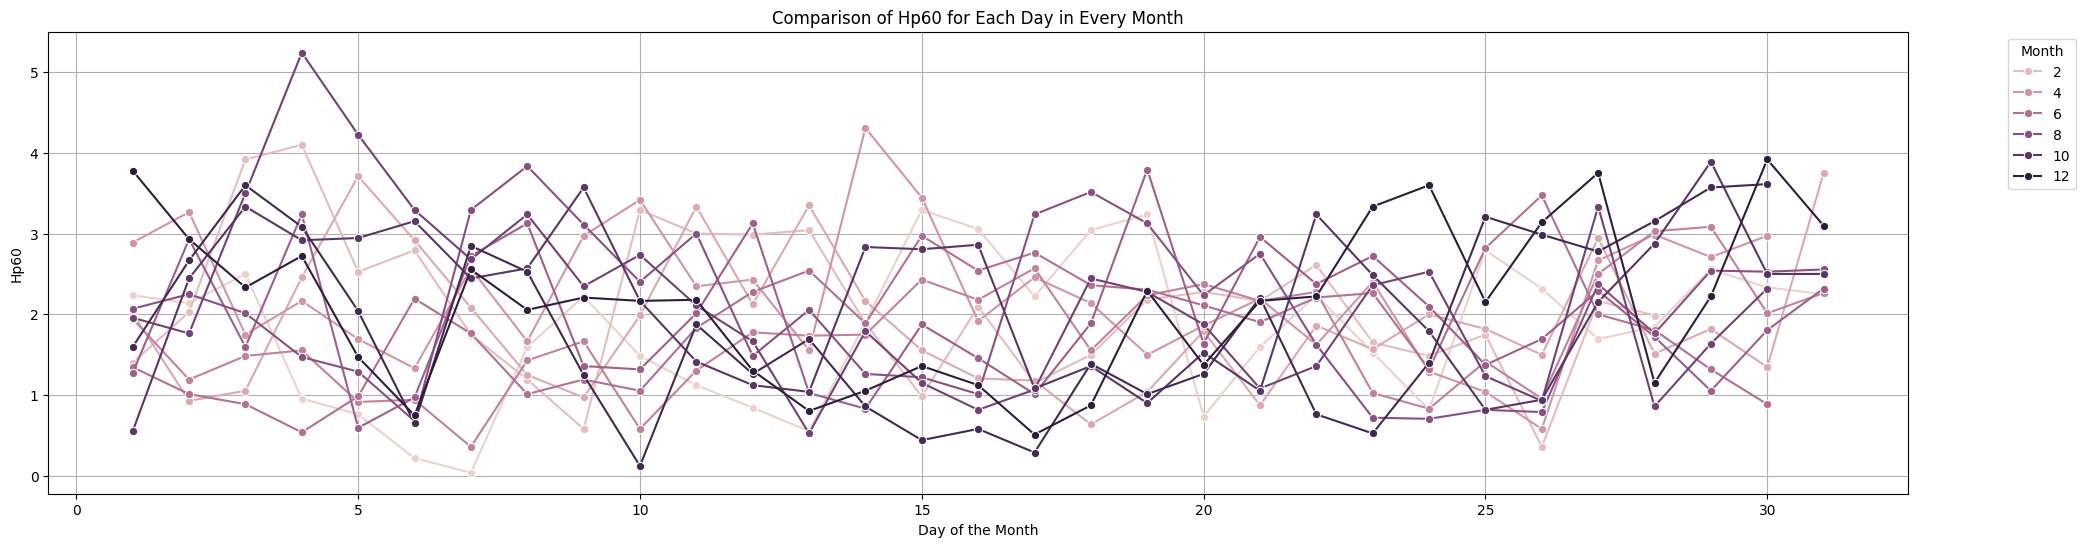

In [8]:
plot_year(2022)

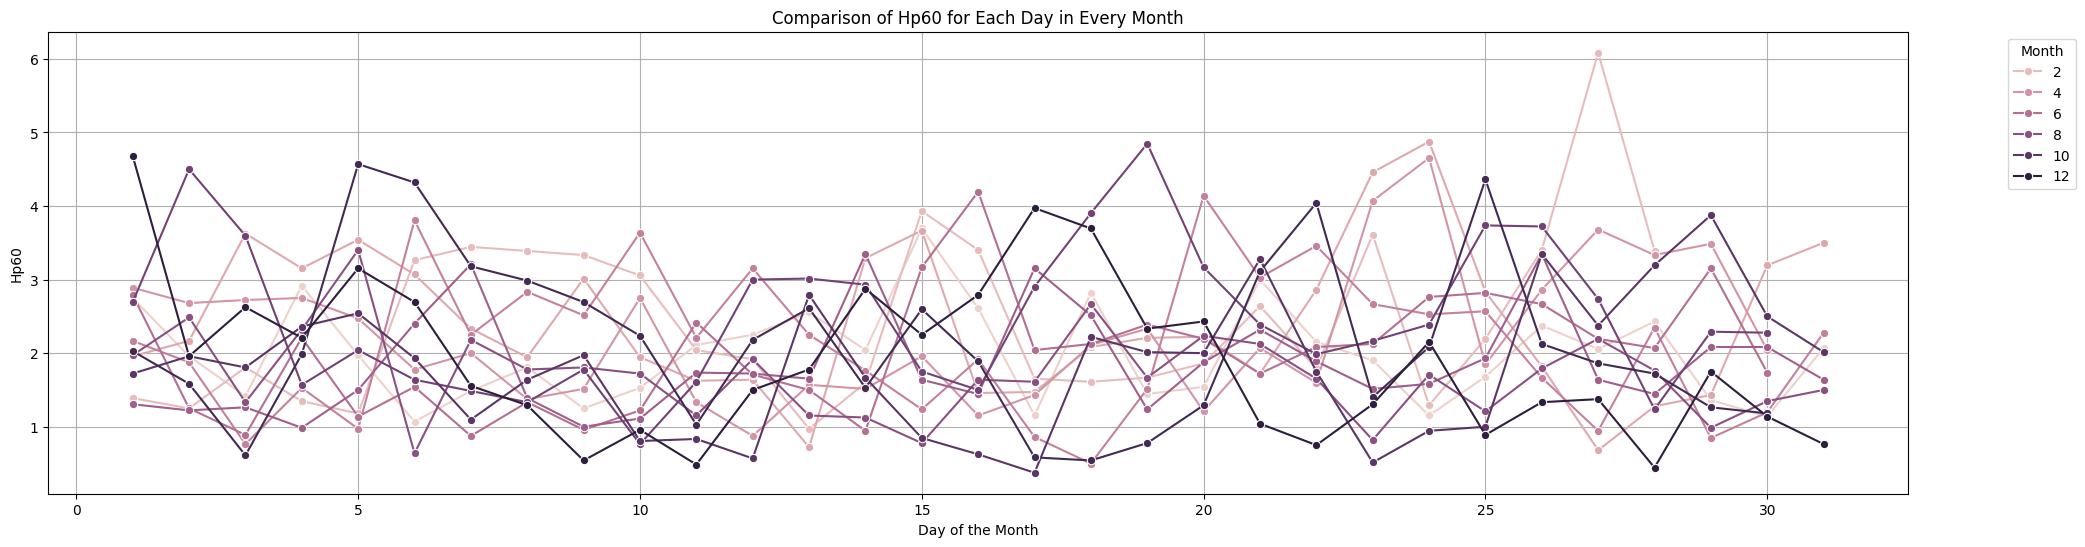

In [9]:
plot_year(2023)

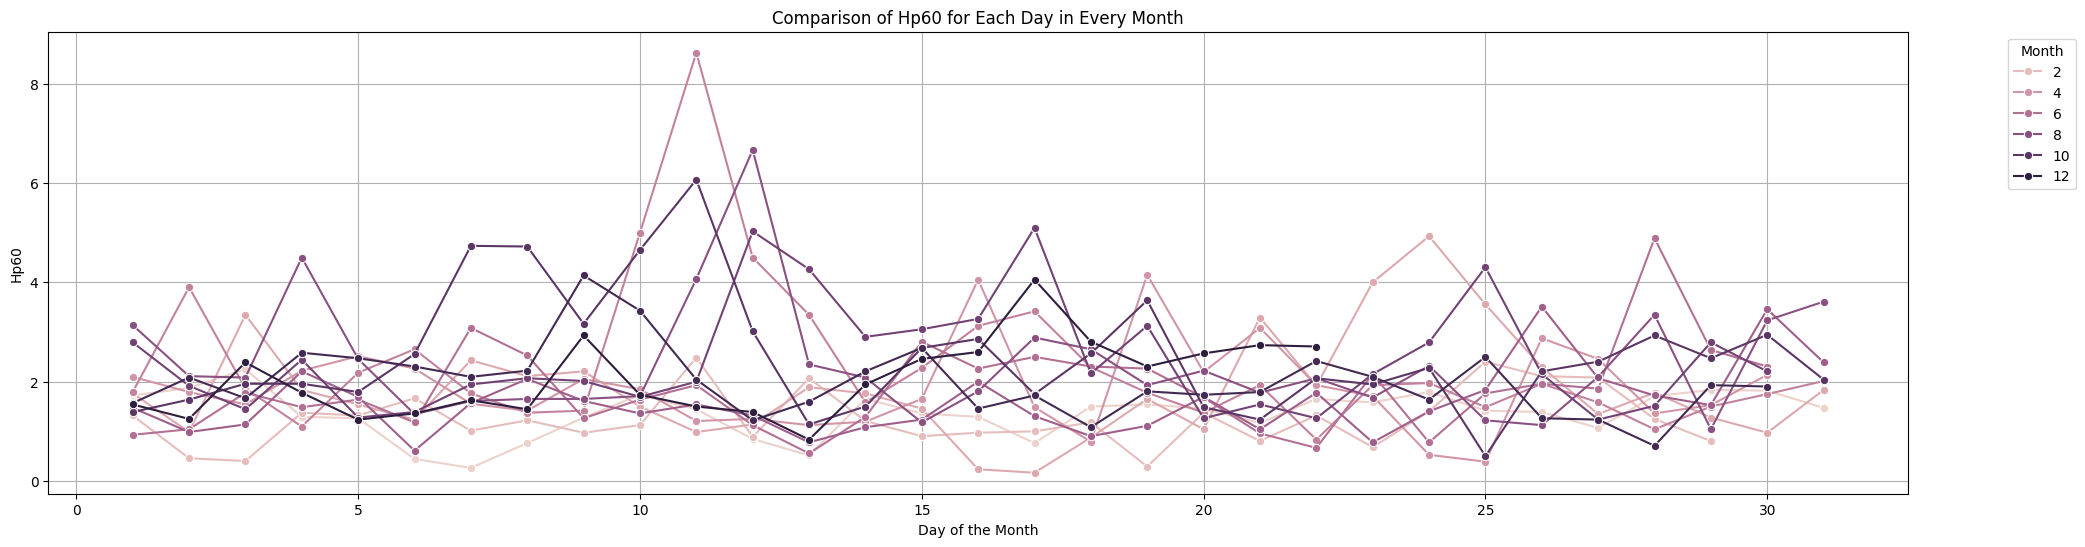

In [10]:
plot_year(2024)